<a href="https://colab.research.google.com/github/3veditha/bone-fracture-detection/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")


In [17]:
# Load the dataset
data = pd.read_csv('/content/forecasting-unit-sales-vit-task-2/sample_submission.csv')
data = pd.read_csv('/content/forecasting-unit-sales-vit-task-2/test.csv')



# Display the first few rows of the dataset
print(data.head())

# Display summary statistics of the dataset
print(data.describe())

# Display the data types of each column
print(data.dtypes)


                      ID        date     Item Id  \
0  2024-07-01_B09KDR64LT  2024-07-01  B09KDR64LT   
1  2024-07-01_B09KDTS4DC  2024-07-01  B09KDTS4DC   
2  2024-07-01_B09KDTHJ6V  2024-07-01  B09KDTHJ6V   
3  2024-07-01_B09KDQ2BWY  2024-07-01  B09KDQ2BWY   
4  2024-07-01_B09KDYY3SB  2024-07-01  B09KDYY3SB   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 10" Gel Memory Foam Mattres...       NaN  NAPQUEEN   
1  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
2  NapQueen Elizabeth 12" Gel Memory Foam Mattres...       NaN  NAPQUEEN   
3  NapQueen Elizabeth 12" Gel Memory Foam Mattres...       NaN  NAPQUEEN   
4  NapQueen Elizabeth 10" Gel Memory Foam Mattres...    101.72  NAPQUEEN   

   unit_price  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4      1094.5  
           ad_spend   unit_price
count   1382.000000  2833.000000
mean     198.838032    98.725873
std      797.354508   383.585307
mi

In [24]:
import pandas as pd

chunk_size = 10000  # Adjust the chunk size as needed
chunks = pd.read_csv('/content/forecasting-unit-sales-vit-task-2/train.csv', chunksize=chunk_size)

for chunk in chunks:
    # Process each chunk here
    print(chunk.head())



# Display summary statistics of the dataset
print(chunk.describe())

# Display the data types of each column
print(chunk.dtypes)


                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  
                          ID        date     Item Id  \
10000  2022-10-16_B0B69B8R3C  2022-1

ParserError: Error tokenizing data. C error: EOF inside string starting at row 32941

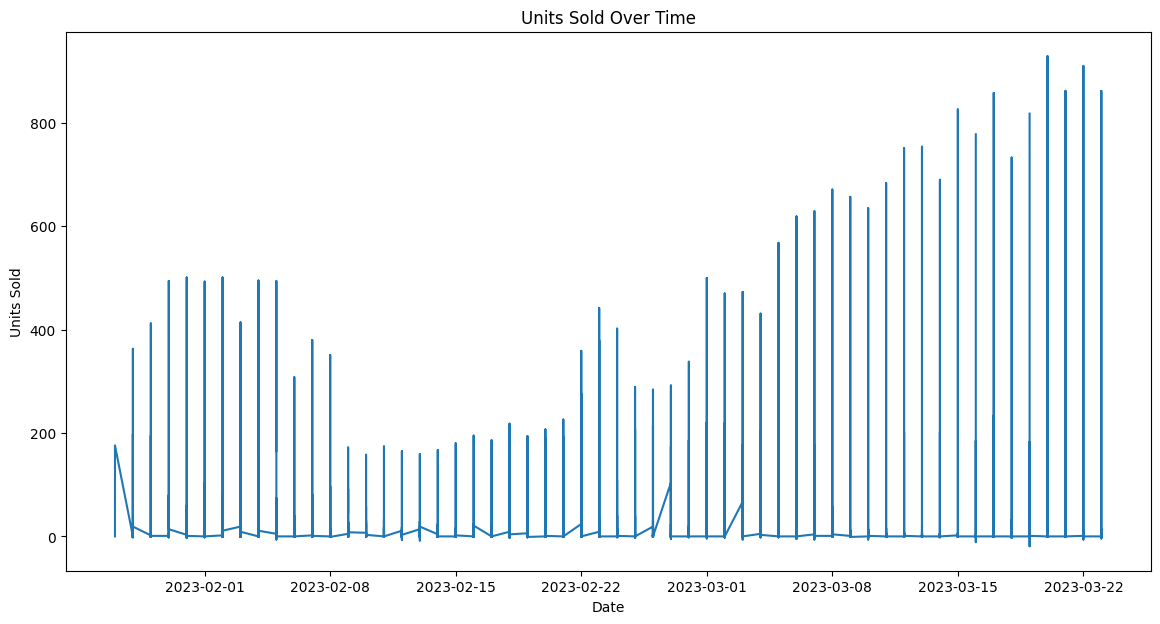

In [28]:
# Convert the 'date' column to datetime format
chunk['date'] = pd.to_datetime(chunk['date'])

# Set the 'date' column as the index
chunk.set_index('date', inplace=True)

# Plot the number of units sold over time
plt.figure(figsize=(14, 7))
plt.plot(chunk['units'])
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()


In [29]:
# Create additional time-based features
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.weekday

# Display the first few rows of the dataset with new features
print(data.head())


                               ID     Item Id  \
date                                            
2024-07-01  2024-07-01_B09KDR64LT  B09KDR64LT   
2024-07-01  2024-07-01_B09KDTS4DC  B09KDTS4DC   
2024-07-01  2024-07-01_B09KDTHJ6V  B09KDTHJ6V   
2024-07-01  2024-07-01_B09KDQ2BWY  B09KDQ2BWY   
2024-07-01  2024-07-01_B09KDYY3SB  B09KDYY3SB   

                                                    Item Name  ad_spend  \
date                                                                      
2024-07-01  NapQueen Elizabeth 10" Gel Memory Foam Mattres...       NaN   
2024-07-01  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-01  NapQueen Elizabeth 12" Gel Memory Foam Mattres...       NaN   
2024-07-01  NapQueen Elizabeth 12" Gel Memory Foam Mattres...       NaN   
2024-07-01  NapQueen Elizabeth 10" Gel Memory Foam Mattres...    101.72   

           anarix_id  unit_price  year  month  day  weekday  
date                                                         
2024-0

In [30]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Display the shapes of the training and testing sets
print(train_data.shape, test_data.shape)


(2266, 10) (567, 10)


In [32]:
# Initialize the model
model = ExponentialSmoothing(chunk['units'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(len(test_data))

# Display the predictions
print(predictions.head())


10000   NaN
10001   NaN
10002   NaN
10003   NaN
10004   NaN
dtype: float64


In [42]:
print(test_data.columns)


Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'unit_price',
       'year', 'month', 'day', 'weekday'],
      dtype='object')


In [54]:
print(test_data.head())


                               ID     Item Id  \
date                                            
2024-07-22  2024-07-22_B09KDTS4DC  B09KDTS4DC   
2024-07-22  2024-07-22_B09KDW1YKQ  B09KDW1YKQ   
2024-07-22  2024-07-22_B09KSYL73R  B09KSYL73R   
2024-07-22  2024-07-22_B09MR2MLZH  B09MR2MLZH   
2024-07-22  2024-07-22_B09KDZQJ6P  B09KDZQJ6P   

                                                    Item Name  ad_spend  \
date                                                                      
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-22     NapQueen Elsa 8" Innerspring Mattress, Twin XL    339.38   
2024-07-22  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN   
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...     11.93   

           anarix_id  unit_price  year  month  day  weekday  
date                                                         
2024-0

In [57]:
from sklearn.metrics import mean_squared_error

# Print column names to verify the correct name
print("Columns in test_data:", test_data.columns)

# Inspect the first few rows to understand the data
print("First few rows of test_data:")
print(test_data.head())

# Check for any leading/trailing spaces in column names
test_data.columns = test_data.columns.str.strip()

# Use the correct column name based on the output
column_name = 'units'  # Update this if necessary

# Verify that the column exists after stripping spaces
if column_name in test_data.columns:
    # Check lengths of actual and predicted values
    actual_length = len(test_data[column_name])
    predicted_length = len(predictions)

    print(f'Length of actual values: {actual_length}')
    print(f'Length of predicted values: {predicted_length}')

    # Ensure lengths are the same
    if actual_length == predicted_length:
        mse = mean_squared_error(test_data[column_name], predictions)
        print(f'Mean Squared Error: {mse}')
    else:
        print("Error: The length of actual values and predictions do not match.")
else:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")



Columns in test_data: Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'unit_price',
       'year', 'month', 'day', 'weekday'],
      dtype='object')
First few rows of test_data:
                               ID     Item Id  \
date                                            
2024-07-22  2024-07-22_B09KDTS4DC  B09KDTS4DC   
2024-07-22  2024-07-22_B09KDW1YKQ  B09KDW1YKQ   
2024-07-22  2024-07-22_B09KSYL73R  B09KSYL73R   
2024-07-22  2024-07-22_B09MR2MLZH  B09MR2MLZH   
2024-07-22  2024-07-22_B09KDZQJ6P  B09KDZQJ6P   

                                                    Item Name  ad_spend  \
date                                                                      
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-22     NapQueen Elsa 8" Innerspring Mattress, Twin XL    339.38   
2024-07-22  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN   
2024-07-22  Na

In [62]:
print("Columns in chunk:", chunk.columns)
print("Columns in test_data:", test_data.columns)


Columns in chunk: Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price'],
      dtype='object')
Columns in test_data: Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'unit_price',
       'year', 'month', 'day', 'weekday'],
      dtype='object')


In [63]:
print("First few rows of chunk:")
print(chunk.head())

print("First few rows of test_data:")
print(test_data.head())


First few rows of chunk:
                               ID     Item Id  \
date                                            
2023-01-27  2023-01-27_B0BNL4WZQV  B0BNL4WZQV   
2023-01-27  2023-01-27_B0BNL4Y2J9  B0BNL4Y2J9   
2023-01-27  2023-01-27_B0BRCXCXCV  B0BRCXCXCV   
2023-01-27  2023-01-27_B0BNL4S7GH  B0BNL4S7GH   
2023-01-27  2023-01-27_B0BRCXJ1F6  B0BRCXJ1F6   

                                                    Item Name  ad_spend  \
date                                                                      
2023-01-27  NapQueen 1.5 Inch Ventilated Bamboo Charcoal M...       NaN   
2023-01-27  NapQueen 4 Inch Ventilated Bamboo Charcoal Mem...      1.05   
2023-01-27  NapQueen Anula, Queen 10'' Green Tea Memory Fo...      0.00   
2023-01-27  NapQueen 2 Inch Ventilated Bamboo Charcoal Mem...      2.84   
2023-01-27                 NapQueen Anula Green Tea 6'', King      0.00   

           anarix_id  units  unit_price  
date                                     
2023-01-27  NAPQUEEN 

Columns in chunk: Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price'],
      dtype='object')
Columns in test_data: Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'unit_price',
       'year', 'month', 'day', 'weekday'],
      dtype='object')
First few rows of chunk:
                               ID     Item Id  \
date                                            
2023-01-27  2023-01-27_B0BNL4WZQV  B0BNL4WZQV   
2023-01-27  2023-01-27_B0BNL4Y2J9  B0BNL4Y2J9   
2023-01-27  2023-01-27_B0BRCXCXCV  B0BRCXCXCV   
2023-01-27  2023-01-27_B0BNL4S7GH  B0BNL4S7GH   
2023-01-27  2023-01-27_B0BRCXJ1F6  B0BRCXJ1F6   

                                                    Item Name  ad_spend  \
date                                                                      
2023-01-27  NapQueen 1.5 Inch Ventilated Bamboo Charcoal M...       NaN   
2023-01-27  NapQueen 4 Inch Ventilated Bamboo Charcoal Mem...      1.05   
2023-01-27  NapQueen Anula, Queen 1

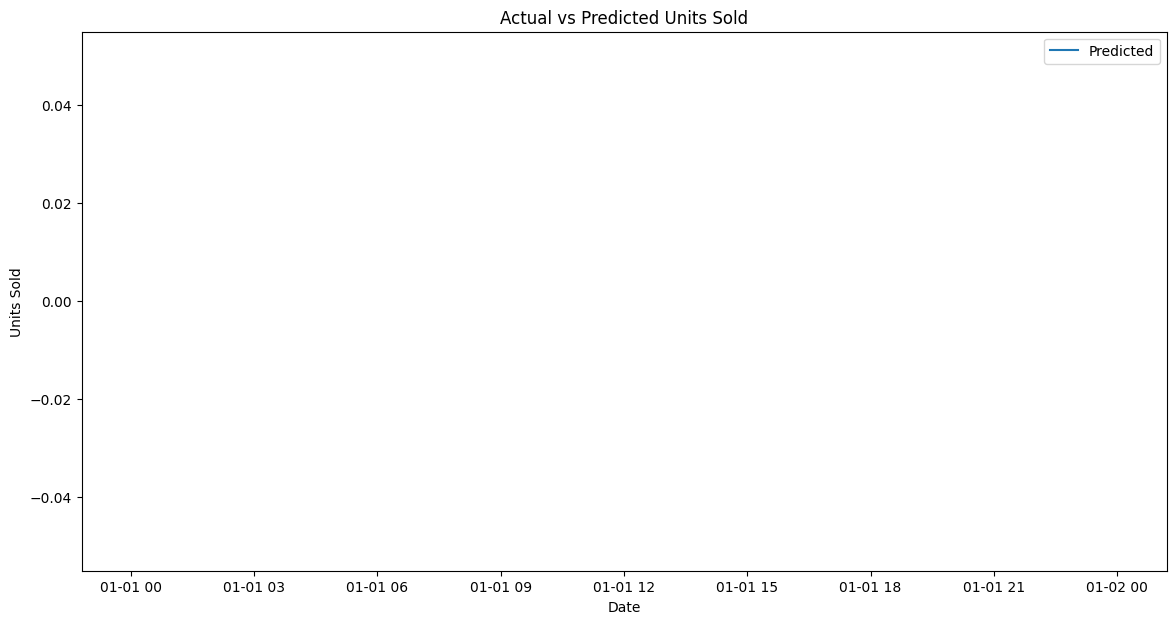

In [67]:
import matplotlib.pyplot as plt

# Print column names and sample data
print("Columns in chunk:", chunk.columns)
print("Columns in test_data:", test_data.columns)
print("First few rows of chunk:")
print(chunk.head())
print("First few rows of test_data:")
print(test_data.head())

# Ensure column name is correct
column_name = 'Unit_Sales'  # Update if necessary

# Check lengths and indices
print("Length of test_data:", len(test_data))
print("Length of predictions:", len(predictions))
print("Index of chunk:", chunk.index)
print("Index of test_data:", test_data.index)

# Plotting the data
plt.figure(figsize=(14, 7))

# Plotting the 'Train' data
if column_name in chunk.columns:
    plt.plot(chunk.index, chunk[column_name], label='Train')
else:
    print(f"Error: Column '{column_name}' does not exist in 'chunk'.")

# Plotting the 'Test' data
if column_name in test_data.columns:
    plt.plot(test_data.index, test_data[column_name], label='Test')
else:
    print(f"Error: Column '{column_name}' does not exist in 'test_data'.")

# Plotting the 'Predicted' data
# Ensure predictions are the correct length
if len(test_data) == len(predictions):
    plt.plot(test_data.index, predictions, label='Predicted')
else:
    print("Error: Length of 'predictions' does not match length of 'test_data'.")

plt.title('Actual vs Predicted Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()



In [73]:
import matplotlib.pyplot as plt

# Print column names to verify the correct name
print("Columns in test_data:", test_data.columns)

# Inspect the first few rows to understand the data
print("First few rows of test_data:")
print(test_data.head())

# Use the correct column name based on the output
column_name = 'units'  # Update this to the actual column name

# Plotting the data
if column_name in test_data.columns:
    plt.plot(test_data.index, test_data[column_name], label='Test')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title('Test Data')
    plt.legend()
    plt.show()
else:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")


Columns in test_data: Index(['ID', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'unit_price',
       'year', 'month', 'day', 'weekday'],
      dtype='object')
First few rows of test_data:
                               ID     Item Id  \
date                                            
2024-07-22  2024-07-22_B09KDTS4DC  B09KDTS4DC   
2024-07-22  2024-07-22_B09KDW1YKQ  B09KDW1YKQ   
2024-07-22  2024-07-22_B09KSYL73R  B09KSYL73R   
2024-07-22  2024-07-22_B09MR2MLZH  B09MR2MLZH   
2024-07-22  2024-07-22_B09KDZQJ6P  B09KDZQJ6P   

                                                    Item Name  ad_spend  \
date                                                                      
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-22  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN   
2024-07-22     NapQueen Elsa 8" Innerspring Mattress, Twin XL    339.38   
2024-07-22  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN   
2024-07-22  Na